**COMPUT MCMD course sping 2019, home work for week 4, Medical Radiation Physics** 

**By: Samuel Wiqvist** 


#### Introduction 

We will I this task first sample photon path-lengths for a few different materials, then we will sample a Compton scattering of a photon.

Setup, load packages that we will use:

In [2]:
using PyPlot # for plotting
using KernelDensity # to compute kernel density estimations
using LaTeXStrings # printing strings with LaTeX style

┌ Info: Recompiling stale cache file /home/samuel/.julia/compiled/v1.0/KernelDensity/4QyGx.ji for KernelDensity [5ab0869b-81aa-558d-bb23-cbf5423bbe9b]
└ @ Base loading.jl:1184


#### Sample photon path-lengths

We first load the data with different attenuation coefficient $\mu$ for the materials: water (H2O), alumnimum (Al), iodine (I), and lead (Pb). 

In [8]:
# load data
include(pwd()*"/data.jl");

The we define the fuction *generate_photon_path_lengths* the inputs to this function are the attenuation coefficient $\mu$, and the number of samples, the output of the function is the sampled path-lengths.

In [12]:
# Function to sample N photon path lengths for some attenuation coefficient μ.
function generate_photon_path_lengths(μ::Real, N::Int)
    d = zeros(N)
    for i in 1:N; d[i] = -1/μ*log(rand()); end
    return d
end


generate_photon_path_lengths (generic function with 1 method)

Then we sample 1000 path-lengths for different energy-levels (i.e. different attenuation coefficients $\mu$'s) for the materials: water (H2O), alumnimum (Al), iodine (I), and lead (Pb). The plots below show the kenrndel density estimations of the distributions of the sampled path-lengths. We conclude that the distribtuions for the path-lengths vary for the different material, and that the distributions of path-lengths for the water and aluminom are quite similar, while the distributions of path-lengths for iodine and lead have other charactersitcs. In particlular we see that we distributions of path-lengths for iodine and lead are much more centered at small path-lengths.

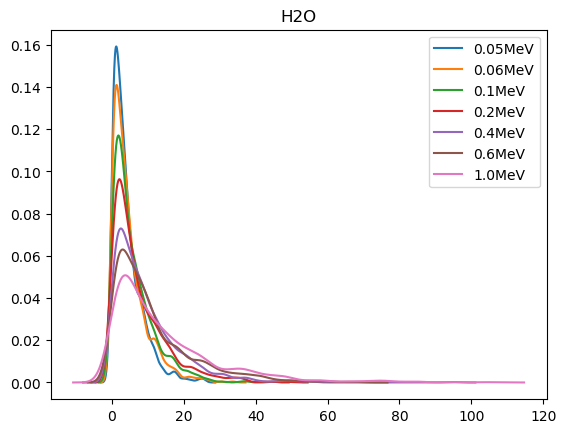

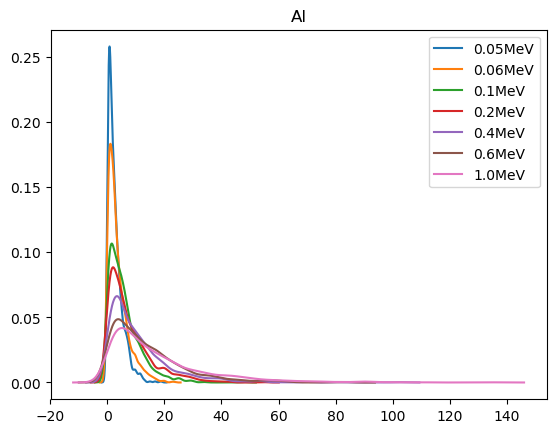

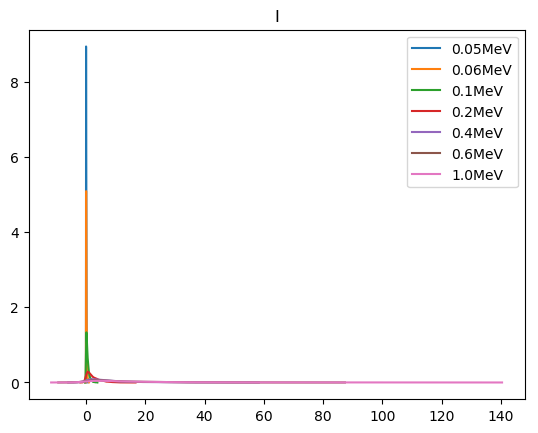

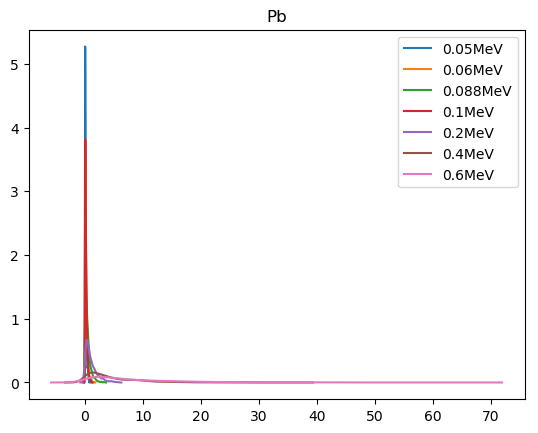

PyObject <matplotlib.legend.Legend object at 0x7f4d74556940>

In [13]:

PyPlot.figure()
for i = 1:size(data_h2o,1)
    μ = sum(data_h2o[i,end-1])
    N = 10^3
    d = generate_photon_path_lengths(μ, N)
    kde_est = kde(d)
    PyPlot.plot(kde_est.x, kde_est.density, label=string(data_h2o[i,1])*"MeV")
    PyPlot.title("H2O")
end
PyPlot.legend()

PyPlot.figure()
for i = 1:size(data_h2o,1)
    μ = sum(data_Al[i,end-1])
    N = 10^3
    d = generate_photon_path_lengths(μ, N)
    kde_est = kde(d)
    PyPlot.plot(kde_est.x, kde_est.density, label=string(data_Al[i,1])*"MeV")
    PyPlot.title("Al")
end
PyPlot.legend()

PyPlot.figure()
for i = 1:size(data_h2o,1)
    μ = sum(data_I[i,end-1])
    N = 10^3
    d = generate_photon_path_lengths(μ, N)
    kde_est = kde(d)
    PyPlot.plot(kde_est.x, kde_est.density, label=string(data_I[i,1])*"MeV")
    PyPlot.title("I")
end
PyPlot.legend()

PyPlot.figure()
for i = 1:size(data_h2o,1)
    μ = sum(data_Pb[i,end-1])
    N = 10^3
    d = generate_photon_path_lengths(μ, N)
    kde_est = kde(d)
    PyPlot.plot(kde_est.x, kde_est.density, label=string(data_Pb[i,1])*"MeV")
    PyPlot.title("Pb")
end
PyPlot.legend()


#### Sample Compton scattering

The next task is to sample a Compton scattering of a photon. 

Firstly we define the function *compton_scattering* that takes as input the initial photon energy $hv$ and returns the samples new angle $\theta$ and new energy $hv'$.

In [17]:
# Function to generate one compton scattering event.
function compton_scattering(hv::Float64)

    h = 1; m_0 = 1; c = 1

    λ = hv / (m_0*c^2)
    Q = (2*λ + 1)/(2*λ + 9)

    run_sampler = true

    nbr_sampels = 0; hv_prime = 0.; θ = 0.; cosθ = 0.

    while run_sampler

        nbr_sampels = nbr_sampels + 1

        R1 = rand(); R2 = rand(); R3 = rand()

        if R1 < Q
            ρ = 1 + 2*λ*R2
            if R3 > (4*(ρ-1))/ρ^2
                # generate new sample
            else
                cosθ = 1-2*R2
                θ = acos(cosθ)
                θ = θ*180/π
                hv_prime = hv/ρ
                run_sampler = false
            end
        else
            ρ = (2*λ + 1)/(2*λ*R2 + 1)
            if R3 > ((1-(ρ-1)/λ)^2 + 1/ρ)/2
                # generate new sample
            else
                cosθ = 1-(ρ-1)/λ
                θ = acos(cosθ)
                θ = θ*180/π
                hv_prime = hv/ρ
                run_sampler = false
            end
        end

    end

    return [hv_prime; θ; cosθ; nbr_sampels]

end


compton_scattering (generic function with 1 method)

For our simulations we sample $100000$ Compton scatterings for the initial energies $hv = [0.05, 0.06, 0.1, 0.2, 0.4, 0.6, 1.0] \, (MeV)$

In [18]:
# sample compton scattering
N = 100000
energy_levels = data_h2o[:,1]
samples_compton_scattering = zeros(4,N,length(energy_levels))

for i in 1:length(energy_levels)
    for j = 1:N
        samples_compton_scattering[:,j,i] = compton_scattering(energy_levels[i])
    end
end


Finally, we plot the new angels $\theta$ and the new energies $hv'$ for the different inital energies. Add some conclusions...

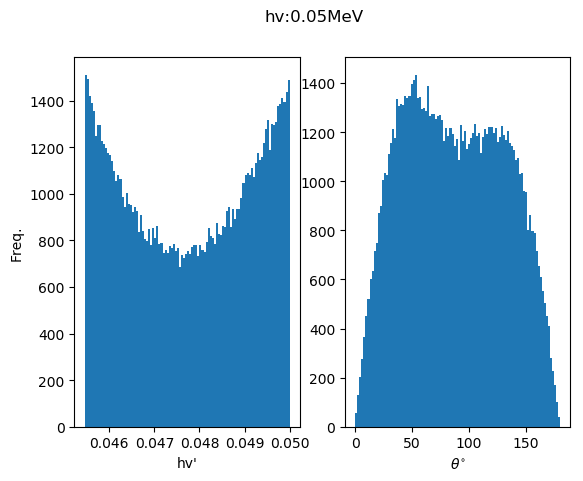

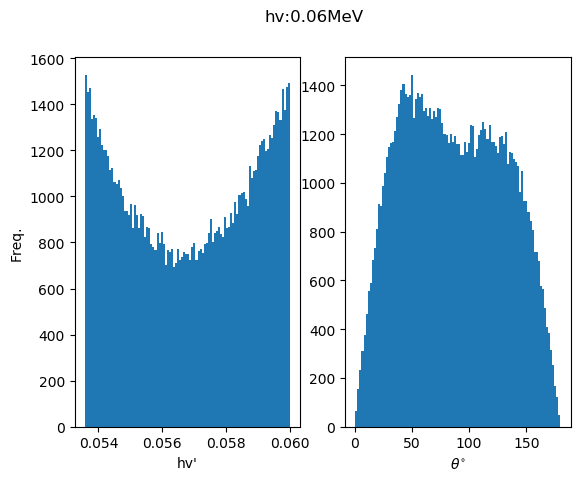

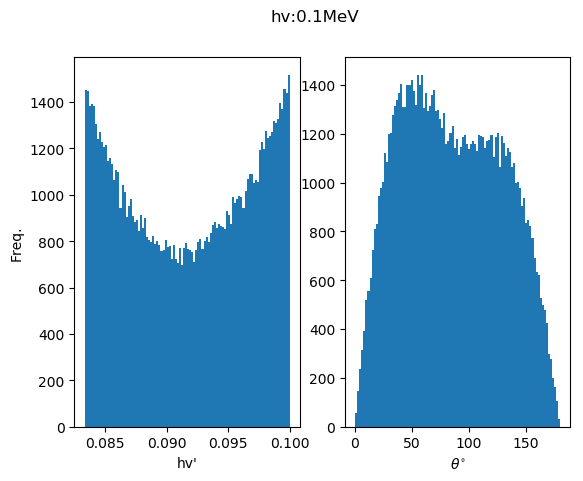

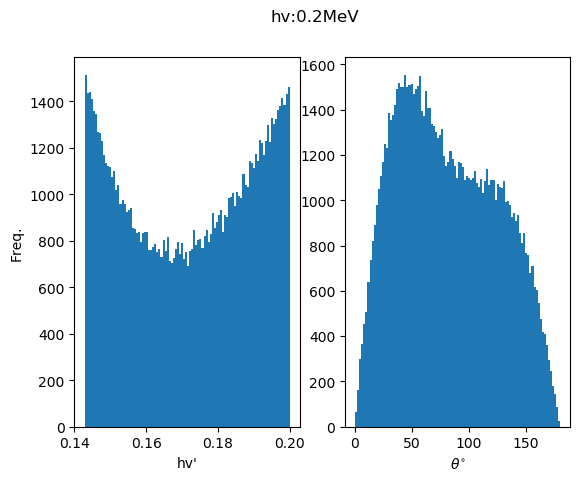

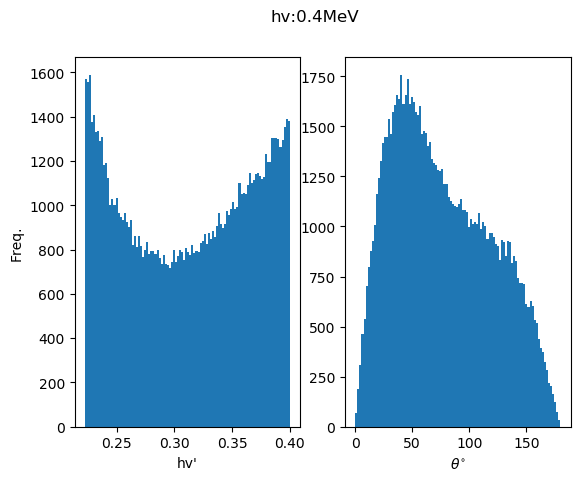

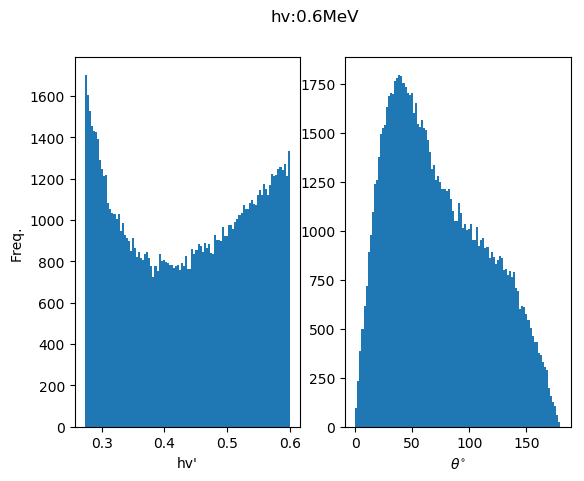

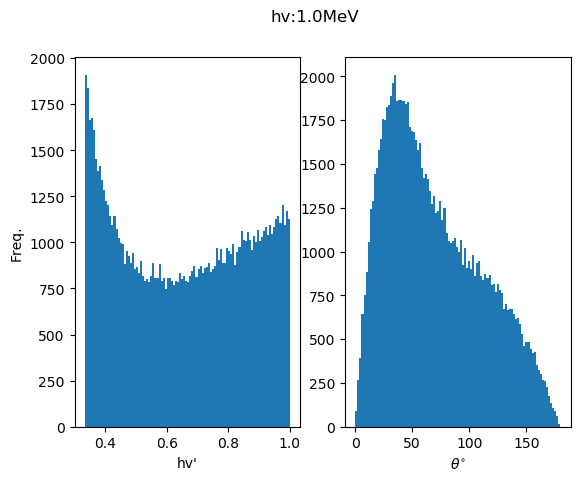

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[33]:11
└ @ Core ./In[33]:11
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[33]:16
└ @ Core ./In[33]:16


In [33]:

PyPlot.figure(figsize=(10,40))

energy_level = 0

for i in 1:2:2*length(energy_levels)
    PyPlot.figure()
    global energy_level = energy_level + 1
    PyPlot.subplot(1,2,1)
    #PyPlot.subplot(1,2,i)
    h = PyPlot.plt[:hist](samples_compton_scattering[1,:,energy_level],100)
    PyPlot.ylabel("Freq.")
    PyPlot.xlabel("hv'")
    PyPlot.subplot(1,2,2)
    #PyPlot.subplot(1,2,i+1)
    h = PyPlot.plt[:hist](samples_compton_scattering[2,:,energy_level],100)
    PyPlot.xlabel(L"\theta^{\circ}")
    PyPlot.suptitle("hv:"*string(data_h2o[energy_level,1])*"MeV")
    
end
